In [1]:
using RDatasets, LinearAlgebra

Let's compare how Poisson EPCA performs against vanilla PCA on compositional data. For this example, we use the [Chemical Composition of Pottery](https://vincentarelbundock.github.io/Rdatasets/doc/carData/Pottery.html) dataset from RDatasets. More information about the dataset can be found on the doc. 

In [2]:
df = dataset("car", "Pottery")
labels = Vector(df[:, 1])
compositions = Matrix(df[:, 2:end])
normalized_compositions = (compositions ./ sum(compositions, dims=2))

26×5 Matrix{Float64}:
 0.546282  0.265554   0.163126   0.00569044   0.0193475
 0.560976  0.287805   0.139431   0.00487805   0.00691057
 0.563707  0.273745   0.149807   0.00501931   0.00772201
 0.48299   0.267535   0.236875   0.00671987   0.00587988
 0.518797  0.265414   0.200752   0.0075188    0.0075188
 0.518554  0.297812   0.165081   0.00808754   0.0104662
 0.531579  0.224211   0.224211   0.0105263    0.00947368
 0.490901  0.244604   0.250106   0.00761744   0.00677105
 0.511521  0.252995   0.208295   0.0133641    0.0138249
 0.478059  0.246878   0.257938   0.0099893    0.00713521
 ⋮                                            
 0.837308  0.126656   0.0333863  0.000529942  0.00211977
 0.889328  0.0741107  0.0331028  0.000494071  0.00296443
 0.873362  0.0912179  0.0329937  0.000485201  0.00194081
 0.896552  0.0650862  0.0310345  0.00301724   0.00431034
 0.907692  0.0574359  0.0287179  0.00307692   0.00307692
 0.905045  0.0563798  0.0331355  0.00296736   0.0024728
 0.917079  0.0505217  0.

In [3]:
using ExpFamilyPCA

indim = size(normalized_compositions)[2]
epca = PoissonEPCA(indim, 3)
A1 = fit!(epca, normalized_compositions; verbose=true, maxiter=20)
Xre1 = decompress(epca, A1)

Iteration: 1/20 | Loss: 0.3776985770944756
Iteration: 10/20 | Loss: 0.36867325307911303
Iteration: 20/20 | Loss: 0.36862849495950095


26×5 Matrix{Float64}:
 0.55789   0.263316   0.174129   0.00880712  0.00928751
 0.56517   0.28765    0.139987   0.00585813  0.00621716
 0.560619  0.271369   0.149931   0.00664221  0.00703909
 0.489977  0.274389   0.232584   0.0101532   0.0104683
 0.519699  0.267125   0.194946   0.00874956  0.00913092
 0.532476  0.298323   0.176258   0.00749988  0.00784588
 0.502582  0.225494   0.212264   0.00981151  0.0102297
 0.47555   0.246751   0.237237   0.00995089  0.0102586
 0.506649  0.248418   0.212305   0.00975436  0.0101481
 0.477675  0.248911   0.2504     0.0111607   0.0114847
 ⋮                                           
 0.853098  0.127299   0.0384221  0.0022624   0.00266706
 0.88351   0.0738662  0.0311446  0.00200539  0.00242745
 0.873266  0.0921028  0.0317753  0.00187292  0.00224867
 0.890381  0.0653157  0.032014   0.00225279  0.00273582
 0.90825   0.0578093  0.0296128  0.00214449  0.00262536
 0.899917  0.0556524  0.0302939  0.00220416  0.00269712
 0.920617  0.0515109  0.0282526  0.002119

In [4]:
using MultivariateStats

In [5]:
M = fit(PCA, normalized_compositions'; maxoutdim=3)
A2 = predict(M, normalized_compositions')'
Xre2 = reconstruct(M, A2')'

26×5 adjoint(::Matrix{Float64}) with eltype Float64:
 0.548914  0.26842    0.16606    0.00784425  0.00876223
 0.559873  0.286644   0.138154   0.00684533  0.00848357
 0.562796  0.272794   0.148743   0.00719938  0.00846742
 0.480504  0.264907   0.234007   0.0104238   0.010159
 0.517715  0.264269   0.199504   0.0091052   0.00940717
 0.518973  0.298261   0.165557   0.00793266  0.009276
 0.53184   0.224484   0.224516   0.00991597  0.0092447
 0.488865  0.242455   0.247753   0.0108673   0.0100594
 0.514062  0.255681   0.211227   0.0095215   0.00950786
 0.476694  0.245425   0.256377   0.011207    0.0102967
 ⋮                                           
 0.836386  0.125686   0.0323177  0.00222731  0.00338237
 0.888994  0.0737728  0.0327001  0.00205473  0.00247803
 0.872608  0.0904268  0.0321149  0.00209245  0.00275822
 0.897485  0.0660772  0.032104   0.00200424  0.00232996
 0.90836   0.0581385  0.0294914  0.00187595  0.00213433
 0.905423  0.0567743  0.033578   0.00202694  0.00219807
 0.916919  0

We can immediately see that Poisson EPCA does better at compressing composition data. The PCA reconstruction contains negative values. Surprisingly, the reconstructed rows sums to around one in both.

In [6]:
sum(Xre1, dims=2)'

1×26 adjoint(::Matrix{Float64}) with eltype Float64:
 1.01343  1.00488  0.9956  1.01757  …  0.990764  1.00511  1.01953  1.0072

In [7]:
sum(Xre2, dims=2)'

1×26 adjoint(::Matrix{Float64}) with eltype Float64:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [8]:
using Statistics

In [9]:
function shift_and_normalize_rows(matrix)
    # NOTE: Following footnote (4) in Roy et al. (2015), we "shift the reconstruction to be non-negative, and rescale it to sum to 1."
    shifted_matrix = matrix .- minimum(matrix, dims=2)
    normalized_matrix = shifted_matrix ./ sum(shifted_matrix, dims=2)
    return normalized_matrix
end

shift_and_normalize_rows (generic function with 1 method)

In [10]:
kl(p, q; ϵ=eps()) = sum(@. p * (log(p + ϵ) - log(q + ϵ)))

means1 = []
means2 = []
for outdim in 1:indim
    @show outdim
    
    # fit EPCA
    epca = PoissonEPCA(indim, outdim)
    A1 = fit!(epca, normalized_compositions; verbose=false, maxiter=100)
    Xre1 = decompress(epca, A1)

    # fit PCA
    M = fit(PCA, normalized_compositions'; maxoutdim=outdim)
    A2 = predict(M, normalized_compositions')'
    Xre2 = reconstruct(M, A2')'

    X1 = shift_and_normalize_rows(Xre1)
    X2 = shift_and_normalize_rows(Xre2)
    
    kl1 = []
    kl2 = []
    for (p1, p2, q) in zip(eachrow(X1), eachrow(X2), eachrow(normalized_compositions))
        push!(kl1, kl(p1, q))
        push!(kl2, kl(p2, q))
    end
    @show mean(kl1)
    @show mean(kl2)
    push!(means1, mean(kl1))
    push!(means2, mean(kl2))
end

outdim = 1
mean(kl1) = 0.04810417870039517
mean(kl2) = 0.015080791434203116
outdim = 2
mean(kl1) = 0.014186171261079654
mean(kl2) = 0.011338712277564039
outdim = 3
mean(kl1) = 0.011968436478956014
mean(kl2) = 0.011338712277564039
outdim = 4
mean(kl1) = 0.011827713393279008
mean(kl2) = 0.011338712277564039
outdim = 5
mean(kl1) = 0.007941448116426424
mean(kl2) = 0.011338712277564039


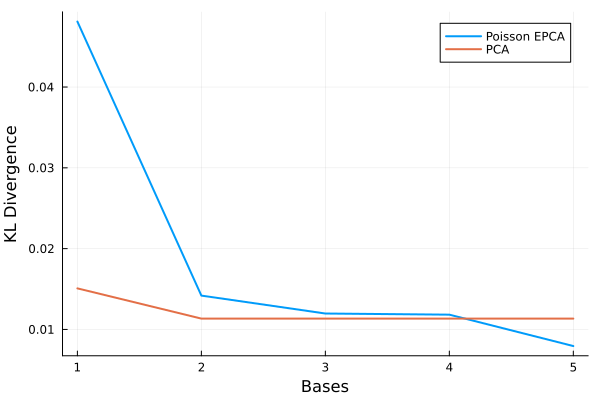

In [11]:
using Plots

# Plotting
plot(1:indim, means1, label="Poisson EPCA", xlabel="Bases", ylabel="KL Divergence", linewidth=2)
plot!(1:indim, means2, label="PCA", linewidth=2)